In [147]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For validation
from sklearn.model_selection import train_test_split

# For curve fitting
from scipy.optimize import curve_fit


def csv_drive_path_generatoer(url:str):
 '''
 Help in read csv file directly from google drive.
 Make sure the csv format is standard.
 url:str - path to csv file example:
   url = 'https://drive.google.com/file/d/126JPZ3lYwdLyJ2d_7jxM9jMtZaOlF-Ld/view?usp=sharing'
 return : str
 '''
 path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
 return path



This notebook illustrates the steps of a typical data science pipeline, but without any rigorous framework. It should be considered as an introduction to the basic ideas and set the ground to the usage of Scikit-learn.

# The data

## Get the data

In this example we will work with the `diamonds` dataset (available [here](https://drive.google.com/drive/folders/1KQXg5CpZ8u59ybkvOnFPzo_WaLHxek_g?usp=sharing)).

In [148]:
path = csv_drive_path_generatoer(url = 'https://drive.google.com/file/d/1eqpYc1U1IrJDy5Qai-YJpSUueb8tbOl0/view?usp=sharing')

In [149]:
diamonds = pd.read_csv(filepath_or_buffer=path, index_col='#')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
#,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [150]:
diamonds.shape

(53940, 10)

In [151]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [152]:
diamonds.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


> **Note:** This is a good point for some [EDA of the diamonds dataset](https://www.kaggle.com/shrutisaxena0617/exploring-diamonds-dataset).

## Clean the data

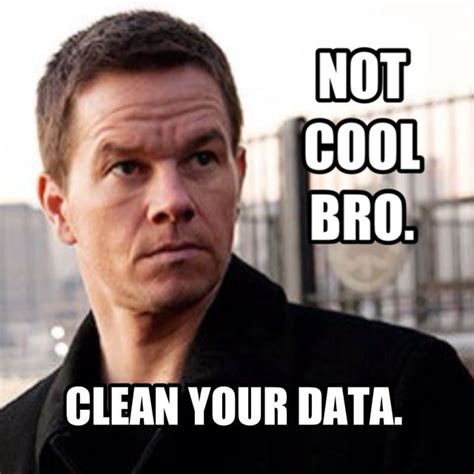

The model learns from any data point it gets, thus it is important to try and remove/change data which is not representative of the data we want our model to learn. Based on our EDA, we can remove the following data points:

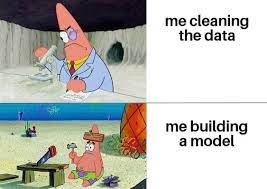

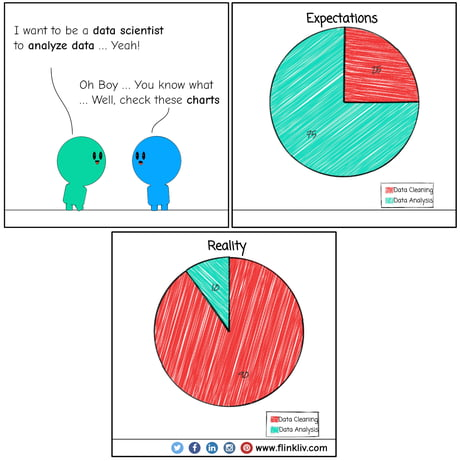

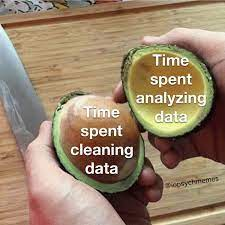

> **Discussion:** What are outliers? Numerical vs. categorical. What about missing data?

### Some example for data cleaning
##### pulling rows which represents diamonds with specifice shape

### diamonds with 0-valued axes

In [153]:
diamonds.shape

(53940, 10)

In [154]:
diamonds = diamonds.loc[diamonds.x * diamonds.y * diamonds.z != 0]

In [155]:
diamonds.shape

(53920, 10)

### Non-round diamonds

The dataset is suppose to contain only round-cut diamonds. Other diamonds may behave differently.

In [156]:
diamonds = diamonds.loc[(diamonds.x - diamonds.y).abs() < 0.1]

In [157]:
diamonds.shape

(52004, 10)

# Framing the proble / defining the model

Quiet intuitively we wish to train a model on the *diamonds* dataset to predict a diamond price based on its properties.

## Features and target

We call the model input $X$ (generally a data frame) and the model output $\hat{y}$, which is the prediction of the model for the known **target** $y$ . The columns of $X$ are called **features**.

In [158]:
X = diamonds.drop(columns = "price")
y = diamonds.price

> **Note:** $X$ is usually in uppercase because it is 2-dimensional, and $y$ is in lowercase because it is 1-dimensional.

## Scoring the model

#### Lets assume two different model predictions vectors, and one real values vector

In [159]:
model_a_predections = [1,2,3,4,5,6,7,8,9,1,4,3,7,5,2,4,8,5,2,5,4,3,4]
model_b_predections = [4,2,2,4,5,6,7,8,9,1,4,3,7,8,5,2,4,8,5,3,5,4,3]
real_values =         [4,2,2,4,5,1,1,1,1,1,5,6,4,3,2,2,4,8,6,4,2,1,7]

#####  Which model is doing better in describing the reaility ? Think and write on a metric which you find helpful

In [160]:
def evaluate(real_values,model_i_predections):
  diffs = [(i-j)**2 for i,j in zip(real_values, model_i_predections)  ]
  evaluation_metric = (sum(diffs)/len(diffs))**0.5
  return evaluation_metric

results_b = evaluate(model_b_predections,real_values)
results_a = evaluate(model_a_predections,real_values)
results_a,results_b

(3.4262414443209646, 3.381535540061002)

In [161]:
evaluate(real_values=real_values,
         model_i_predections = model_a_predections)

3.4262414443209646

Every model has to be evaluated somehow, and it is crucial that we will agree upon a measure, that all of our models will be scored by. There are many different measures, and we will see some of them throughout the course.

For this problem we will introduce the RMSLE, whose equation is given by: $\sqrt{ \frac{1}{N} \sum_{i=1}^N (\log(\hat{y_i}) - \log(y_i))^2 }$

Each lines as better AMS ?
Each lines as higher AMS ?



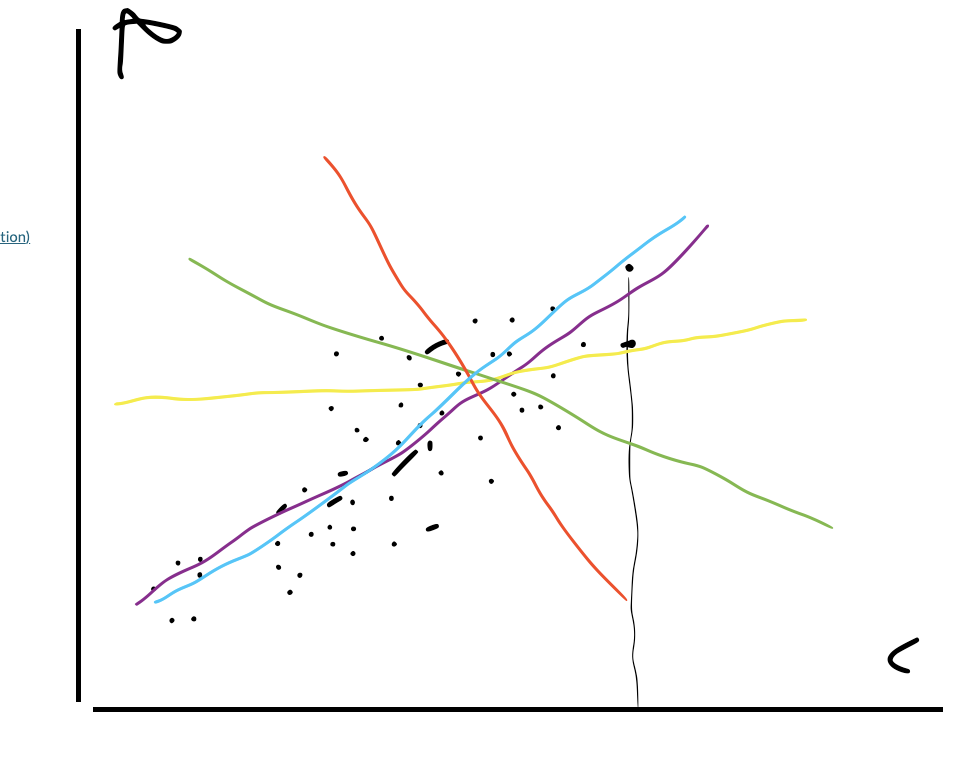


In [162]:
def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

> **Discussion:** Discuss the meaning of RMSLE and consider the RMSE (like RMSLE but without the log) and their differences.

> **Reference:** [Simple illustration of the difference between RMSLE and RMSE by Sharoon Saxena](https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a)

# First model

## Describing the model

> **Discussion:** What is the model that you as a non-expert customer would apply?

> **Discussion:** Can *any* statistical model really describe diamonds prices based on their historical data?

Let's say that we always **predict** that the diamond will cost as the average price of all the diamonds with the same weight (`carat`), regardless of their other parameters. Obviously, this is not a great predictive model, but hey, this is just the beginning.

We now have a prediction idea, and we want to test it. Let's see how it performs on the original data.

#### First try it yourself : Create a model for predicting prcies based on carat only

In [163]:
diamonds.clarity.value_counts()

SI1     12594
VS2     11909
SI2      8662
VS1      7940
VVS2     4969
VVS1     3595
IF       1747
I1        588
Name: clarity, dtype: int64

> **Note:** `y_pred` is traditionally marked as $\hat{y}$.

In [164]:
# pd.DataFrame({'carat':diamonds.carat,'y': y, 'y_pred': y_pred}).sample(10)

**$\hat{y}$ will never be exactly like $y$**, but we would like them  to be as similar as possible, and for that we have a scoring function.


In [165]:
rmsle(2, 4)
type(2)

int

> **Discussion:** What does the result mean?

## The model as a black-box

We would like the model to "remember" what it learned from the given data, so we could apply it later to new data. In our example, the model predicts the price based on the carat of the diamond, so we can think of the model as an implementation of the following mapping.

In [166]:
model = y.groupby(X.carat).mean()
model

carat
0.20      365.166667
0.21      380.222222
0.22      391.400000
0.23      485.606897
0.24      505.185039
            ...     
3.65    11668.000000
3.67    16193.000000
4.00    15984.000000
4.01    15223.000000
4.50    18531.000000
Name: price, Length: 269, dtype: float64

Our model "learns" from the available data how to predict the price of a diamond based on its weight. This idea of learning the available data and transforming it to some mapping if called **fitting** because we fit our model to our data.

It is often desirable to have some graphical insight to "what the model does". This is usually **not** an easy requirement due to the complexity of the models, however for this "model" the mapping itself is very illsutrative.

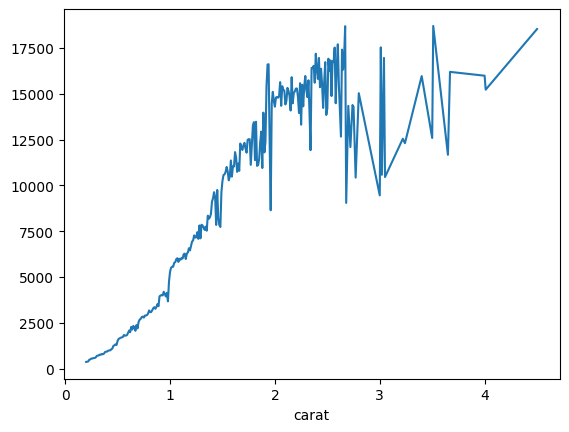

In [167]:
ax = model.plot()

<ipython-input-168-0ff0d5dd95ca>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X.carat_b = round(X.carat/i)*  i


0.25173962956140455

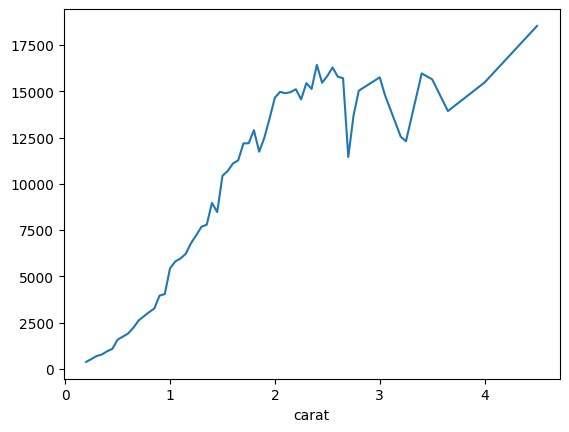

In [168]:
i = 0.05
X.carat_b = round(X.carat/i)*  i
model = y.groupby(X.carat_b).mean()
ax = model.plot()
y_pred = X.carat_b.map(model)
rmsle(y, y_pred)

In [169]:
model.keys

<bound method Series.keys of carat
0.20      375.423077
0.25      530.975748
0.30      695.451415
0.35      777.294655
0.40      950.448961
            ...     
3.40    15964.000000
3.50    15644.000000
3.65    13930.500000
4.00    15476.666667
4.50    18531.000000
Name: price, Length: 62, dtype: float64>

Now we can apply the model to the data (using the [map()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) method) and see its **predictions**.

In [170]:
y_pred = X.carat.map(model)
y_pred

#
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
            ...     
53936            NaN
53937            NaN
53938            NaN
53939            NaN
53940    2840.078197
Name: carat, Length: 52004, dtype: float64

Finally, we can score our model using the measure we've agreed upon.

In [171]:
rmsle(y, y_pred)

0.2509437599256882

In [172]:
y_yaeerk = y[:]
for carat in model.keys():
  mapping = np.log(y.loc[X.carat == carat]).mean()
  y_yaeerk.loc[X.carat == carat] = np.exp(mapping)

In [173]:
rmsle(y, y_yaeerk)

0.1026101806266448

### Addtional model


> **Discussion:**
* Is this model "good"?
* How are we going to use this model?
* What about diamonds with new weights?
* Should we fix the behaviour of the curve?

> **Note:** The model only uses the `carat`, so it is the only **feature** we need to put in `X`.

# Validation

We build the model with $X$ and $y$, and then score it against the same $X$ and $y$, which doesn't make much sense, because how would we know that our model works for a different $X$?

Intuitively, we would like to test our model with data it hasn't seen before. Later in the course we will learn how to avoid this pitfall (with [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))), but for now we will suffice with splitting the data into two parts:
* Train data - the part of the data from which the model will learn
* Test data - the part of the data that will validate the model.

The idea is that in order to validate the model we would like the score of the test data prediction to be as good as the score of the train data prediction. This will give some confidence that the model is not **overfitted** to the train data.

Splitting the data can be done using a function called [`model_selection.train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [174]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=142857)

In [175]:
# split(X,y,0.8,0.2)

We would like to develop a model with RMSLE as low as possible. The model is going to learn only from the train data, therefore it is expected that its score will be better for the predictions of the train data. However, while we improve the model again and again, we also want to make sure that the model is still general enough, so it has a similar score for the test data.

First thing first, we score our model on the train data.

In [176]:
y_train_pred = X_train.carat.map(model)
rmsle(y_train, y_train_pred)

0.25036149579480865

In [177]:
y_test_pred = X_test.carat.map(model)
rmsle(y_test ,y_test_pred)
y_test_pred

#
17262            NaN
22398            NaN
19115            NaN
48038            NaN
8534             NaN
            ...     
46076    1082.631925
39891            NaN
35500            NaN
23860            NaN
3461     3957.568795
Name: carat, Length: 15602, dtype: float64

Next, we apply the same model to the test data. We note there are carat values in the test data that are not recognized by the fitted model. There are several options to deal with this problem, and for now we choose one of them, implemented by the `get_nearest_carat_value()` function.

In [178]:
def get_nearest_value(val):
    idx = (np.abs(X.carat - val)).idxmin()
    return X.carat[idx]

In [179]:
y_test_pred3 = X_test.carat.map(get_nearest_value).map(model)

Finally, we can evaluate the score for the test data to see whether the model is valid.

In [180]:
rmsle(y_test, y_test_pred3)

0.2522418263572456

In [181]:
y_test.index.sort_values(), y_test_pred3.index.sort_values()

(Int64Index([    3,     5,     7,    10,    12,    16,    20,    25,    28,
                33,
             ...
             53904, 53907, 53912, 53921, 53922, 53924, 53925, 53926, 53927,
             53928],
            dtype='int64', name='#', length=15602),
 Int64Index([    3,     5,     7,    10,    12,    16,    20,    25,    28,
                33,
             ...
             53904, 53907, 53912, 53921, 53922, 53924, 53925, 53926, 53927,
             53928],
            dtype='int64', name='#', length=15602))

In [182]:
# Your turn, Write your own algorithm!:
# *** First run it all with the simplest model you find, then make it more complex (adding features, complicated calculations etc' ... )
# 1. Implemnet logic for model training within the function "train_model"
# 2. Implement predict process  within the function "predict"
# 3. Split the data to train and test
# 4. Create model using the train set only
# 5. Generate prediction on the test sets only
# 6. Choos scoring/loss function and evaluate the results
# 7. Compare the results with the above notebook model
# 8. Plot your model (if possible), is it diffferent from the plot above ?
# 9. Try to improve your model.


In [183]:
# Q1 - Train model function
def train_model(X,y):
  model = y.groupby([X.carat]).mean().round(1)
  return model

model = train_model(X,y)

In [184]:
# Q2 - Implement predict process  within the function "predict"
def predict(model,X):
  y_pred = X.carat.map(model)
  return y_pred

y_pred = predict(model,X)

In [185]:
# Q3 - split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3,  random_state=142857)

In [186]:
# Q4 - Create model using the train dataset only
train_set_model = train_model(X_train,y_train)

In [187]:
# Q5 - Generate prediction on the test sets only

test_set_model = train_model(X_test,y_test)

# generate prediction using all data

all_model = train_model(X,y)

# generate prediction based on train data only
train_set_model = train_model(X_train,y_train)

# predict y based on all data
all_y_pred = X.carat.map(all_model)

# predict y based on train data
train_y_pred = X_train.carat.map(train_set_model)

# predict y based on test data
test_y_pred = X_test.carat.map(test_set_model)

In [188]:
# Q6 - Choose scoring/loss function and evaluate the results
# use rmsle to compare prediction's error/distance from real values

def rmsle(y_true: pd.Series, y_pred:pd.Series):
    return (((np.log1p(y_true)-np.log1p(y_pred))**2).mean())**0.5

# calc rmsle of prediction calculated based on all data
rmsle_all = rmsle(y,all_y_pred).round(6)

# calc rmsle of prediction calculated based on train data
rmsle_train = rmsle(y_train,train_y_pred).round(6)

# calc rmsle of prediction calculated based on test data
rmsle_test = rmsle(y_test,test_y_pred).round(6)

print(f'rmsle_all = {rmsle_all}, rmsle_train = {rmsle_train}, rmsle_test = {rmsle_test}')

rmsle_all = 0.248766, rmsle_train = 0.248024, rmsle_test = 0.248879


In [189]:
# Q8 - plot your model
# train_set_model.plot()

In [249]:
# Q9 - improve your model

def train_model2(X,y):
  X=X.join(y)
  model2 = X.groupby('group_name')[y.name].mean()
  return model2

def predict2(X,model2):
  y_pred2 = X.group_name.map(model2)
  return y_pred2

for i in range(1,len(X.columns[:5].values)+1):
  # itterate over tested feature combinations
  features = list(X.columns[:i].values)

  # create an X dataframe grouped by chosen features; each unique group is numbered
  X['group_name'] = X.groupby(features).ngroup()

  # split the datasets to train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # create a model per selected features using train data
  model2 = train_model2(X_train,y_train)

  # predict y (price) per model2
  y_pred2 = predict2(X_test, model2)

  # calc & print model's rmsle
  rmsle2 = rmsle(y_test,y_pred2)
  print(f"per test data, model's rmsle based on {features} is: {rmsle2.round(3)}")

per test data, model's rmsle based on ['carat'] is: 0.251
per test data, model's rmsle based on ['carat', 'cut'] is: 0.243
per test data, model's rmsle based on ['carat', 'cut', 'color'] is: 0.217
per test data, model's rmsle based on ['carat', 'cut', 'color', 'clarity'] is: 0.109
per test data, model's rmsle based on ['carat', 'cut', 'color', 'clarity', 'depth'] is: 0.14
